In [43]:
from torchgeo.datasets import MillionAID
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import imageio as io
from PIL import Image

In [36]:
train_path = '/mnt/e/julia/datasets/AID_dataset/train/'

In [78]:
class MillionAIDDataset(Dataset):
    def __init__(self, rootdir, train=True, transform=None, tag=100):
        labels = [
            "agriculture_land",
            'commercial_land',
            'industrial_land',
            'public_service_land',
            'residential_land',
            'transportation_land',
            'unutilized_land',
            'water_area'           
        ]
        
        trn_files = [] # filepaths
        trn_categorical_targets = [] # string labels
        trn_targets = []
        
        for i, sub_dir in enumerate(labels):
            name_dir = os.path.join(rootdir, sub_dir)
            print(name_dir)
            for root, dirs, files in os.walk(name_dir):
                for filename in files:
                    fpath = os.path.join(root, filename)
                    print(fpath)
                    trn_files.append(fpath)
                    trn_categorical_targets.append(sub_dir)
                    trn_targets.append(i)
                
        self.targets = trn_targets
        self.labelled_dict = dict(zip(trn_files, trn_categorical_targets))
        self.files = trn_files
        self.transform = transform
    
    def __len__(self):
        return len(self.targets)

    def __getitem__(self, i):
        img_path = self.files[i]

        img = Image.open(img_path)

        #if self.transform != None:

        img = self.transform(img)

        return img, self.targets[i]
    
    def showitem(self, i):
        img_path = self.files[i]
        img = io.imread(img_path)
        plt.figure()
        plt.imshow(img)

In [79]:
full_train_dataset = MillionAIDDataset(rootdir='/mnt/e/julia/datasets/AID_dataset/train/', transform=train_transform)

/mnt/e/julia/datasets/AID_dataset/train/agriculture_land
/mnt/e/julia/datasets/AID_dataset/train/agriculture_land/arable_land/dry_field/P0011232.jpg
/mnt/e/julia/datasets/AID_dataset/train/agriculture_land/arable_land/dry_field/P0013604.jpg
/mnt/e/julia/datasets/AID_dataset/train/agriculture_land/arable_land/dry_field/P0016268.jpg
/mnt/e/julia/datasets/AID_dataset/train/agriculture_land/arable_land/dry_field/P0016445.jpg
/mnt/e/julia/datasets/AID_dataset/train/agriculture_land/arable_land/dry_field/P0028518.jpg
/mnt/e/julia/datasets/AID_dataset/train/agriculture_land/arable_land/dry_field/P0030193.jpg
/mnt/e/julia/datasets/AID_dataset/train/agriculture_land/arable_land/dry_field/P0030777.jpg
/mnt/e/julia/datasets/AID_dataset/train/agriculture_land/arable_land/dry_field/P0033841.jpg
/mnt/e/julia/datasets/AID_dataset/train/agriculture_land/arable_land/dry_field/P0034822.jpg
/mnt/e/julia/datasets/AID_dataset/train/agriculture_land/arable_land/dry_field/P0036166.jpg
/mnt/e/julia/datasets/A

/mnt/e/julia/datasets/AID_dataset/train/industrial_land/mining_area/quarry/P0030015.jpg
/mnt/e/julia/datasets/AID_dataset/train/industrial_land/mining_area/quarry/P0046105.jpg
/mnt/e/julia/datasets/AID_dataset/train/industrial_land/mining_area/quarry/P0079297.jpg
/mnt/e/julia/datasets/AID_dataset/train/industrial_land/mining_area/quarry/P0094723.jpg
/mnt/e/julia/datasets/AID_dataset/train/industrial_land/mining_area/quarry/P0175903.jpg
/mnt/e/julia/datasets/AID_dataset/train/industrial_land/mining_area/quarry/P0199212.jpg
/mnt/e/julia/datasets/AID_dataset/train/industrial_land/mining_area/quarry/P0287123.jpg
/mnt/e/julia/datasets/AID_dataset/train/industrial_land/mining_area/quarry/P0292612.jpg
/mnt/e/julia/datasets/AID_dataset/train/industrial_land/mining_area/quarry/P0318626.jpg
/mnt/e/julia/datasets/AID_dataset/train/industrial_land/mining_area/quarry/P0431860.jpg
/mnt/e/julia/datasets/AID_dataset/train/industrial_land/mining_area/quarry/P0520285.jpg
/mnt/e/julia/datasets/AID_datase

/mnt/e/julia/datasets/AID_dataset/train/public_service_land/sports_land/stadium/P0020610.jpg
/mnt/e/julia/datasets/AID_dataset/train/public_service_land/sports_land/stadium/P0036515.jpg
/mnt/e/julia/datasets/AID_dataset/train/public_service_land/sports_land/stadium/P0194875.jpg
/mnt/e/julia/datasets/AID_dataset/train/public_service_land/sports_land/stadium/P0253499.jpg
/mnt/e/julia/datasets/AID_dataset/train/public_service_land/sports_land/stadium/P0383822.jpg
/mnt/e/julia/datasets/AID_dataset/train/public_service_land/sports_land/stadium/P0616190.jpg
/mnt/e/julia/datasets/AID_dataset/train/public_service_land/sports_land/stadium/P0825180.jpg
/mnt/e/julia/datasets/AID_dataset/train/public_service_land/sports_land/stadium/P0827819.jpg
/mnt/e/julia/datasets/AID_dataset/train/public_service_land/sports_land/tennis_court/P0000432.jpg
/mnt/e/julia/datasets/AID_dataset/train/public_service_land/sports_land/tennis_court/P0002040.jpg
/mnt/e/julia/datasets/AID_dataset/train/public_service_land/

/mnt/e/julia/datasets/AID_dataset/train/transportation_land/port_area/pier/P0000775.jpg
/mnt/e/julia/datasets/AID_dataset/train/transportation_land/port_area/pier/P0005960.jpg
/mnt/e/julia/datasets/AID_dataset/train/transportation_land/port_area/pier/P0006323.jpg
/mnt/e/julia/datasets/AID_dataset/train/transportation_land/port_area/pier/P0006379.jpg
/mnt/e/julia/datasets/AID_dataset/train/transportation_land/port_area/pier/P0011299.jpg
/mnt/e/julia/datasets/AID_dataset/train/transportation_land/port_area/pier/P0017667.jpg
/mnt/e/julia/datasets/AID_dataset/train/transportation_land/port_area/pier/P0023603.jpg
/mnt/e/julia/datasets/AID_dataset/train/transportation_land/port_area/pier/P0025200.jpg
/mnt/e/julia/datasets/AID_dataset/train/transportation_land/port_area/pier/P0038421.jpg
/mnt/e/julia/datasets/AID_dataset/train/transportation_land/port_area/pier/P0040084.jpg
/mnt/e/julia/datasets/AID_dataset/train/transportation_land/port_area/pier/P0041233.jpg
/mnt/e/julia/datasets/AID_datase

In [76]:
full_train_dataset.__len__()

10000

/tmp/ipykernel_3307/4073770298.py:49: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = io.imread(img_path)


IndexError: list index out of range

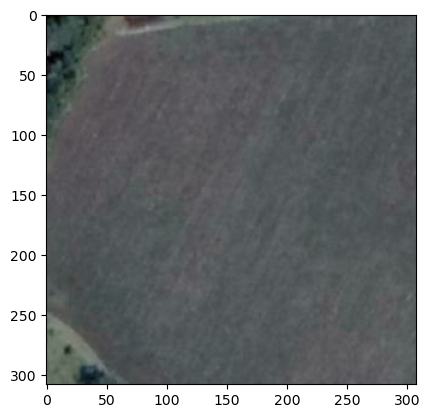

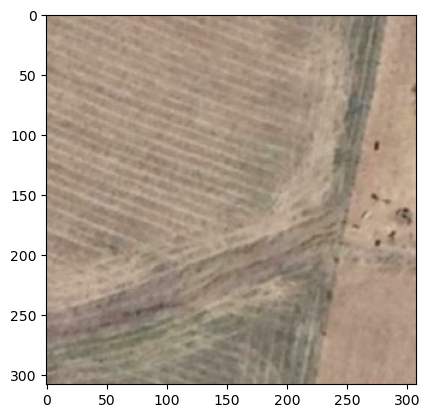

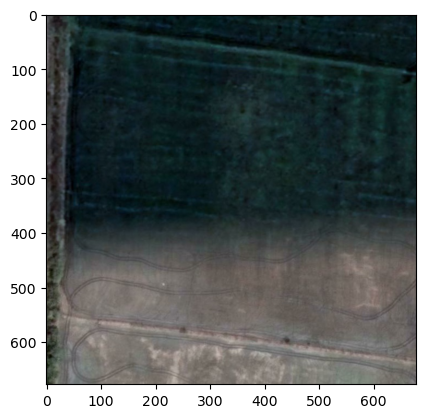

In [77]:
for i in [0, 50, 800,  10000, 50000, 80000]:
    full_train_dataset.showitem(i)

In [55]:
full_train_dataset.__getitem__(0)

(tensor([[[-2.0665, -2.0494, -2.0323,  ..., -0.6965, -0.6281, -0.5938],
          [-2.1008, -2.0665, -1.9638,  ..., -0.6794, -0.6109, -0.5938],
          [-1.9638, -1.9124, -1.7069,  ..., -0.6794, -0.6281, -0.5767],
          ...,
          [-0.2684, -0.3198, -0.3712,  ..., -0.6281, -0.6281, -0.6281],
          [-0.3198, -0.3198, -0.3712,  ..., -0.6281, -0.5938, -0.5938],
          [-0.3541, -0.3198, -0.3369,  ..., -0.6452, -0.6109, -0.6109]],
 
         [[-1.9832, -1.9832, -1.9657,  ..., -0.4601, -0.3725, -0.3375],
          [-1.9832, -1.9657, -1.8606,  ..., -0.4776, -0.4076, -0.3550],
          [-1.7731, -1.7381, -1.5280,  ..., -0.4776, -0.4251, -0.3725],
          ...,
          [ 0.0301, -0.0224, -0.0749,  ..., -0.4076, -0.4251, -0.4776],
          [-0.0224, -0.0224, -0.0574,  ..., -0.4076, -0.3901, -0.4426],
          [-0.0574, -0.0224, -0.0399,  ..., -0.4251, -0.4076, -0.4601]],
 
         [[-1.7173, -1.7347, -1.7173,  ..., -0.1835, -0.1138, -0.0790],
          [-1.7696, -1.7522,

In [ ]:
train_dataset, val_dataset = torch.utils.data.random_split(full_train_dataset, [0.85, 0.15])

In [4]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision.transforms as transforms
import numpy as np
import time
import os
import copy
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchgeo.datasets import MillionAID

# define the transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])

# create the data loaders
train_dataset = MillionAID(root='/mnt/e/julia/datasets/AID_dataset/train/', split='train', transforms=train_transform)
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [0.85, 0.15])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# load the pre-trained ResNet-18 model
model = torchvision.models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 8) # set the number of classes to 2 (i.e. MillionAI has 2 classes)

# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# define the learning rate scheduler
scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# define the device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# define the training function
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                loss.backward()
                optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        train_loss = running_loss / len(train_dataset)
        train_acc = running_corrects.double() / len(train_dataset)
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        print('Train Loss: {:.4f} Train Accuracy: {:.4f}'.format(train_loss, train_acc))

        # validation phase
        model.eval()
        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in val_loader:
            inputs = inputs.to(device)
            labels
            with torch.set_grad_enabled(False):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        val_loss = running_loss / len(val_dataset)
        val_acc = running_corrects.double() / len(val_dataset)
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print('Validation Loss: {:.4f} Validation Accuracy: {:.4f}'.format(val_loss, val_acc))

        # deep copy the model
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = copy.deepcopy(model.state_dict())

        scheduler.step()

    # load best model weights
    model.load_state_dict(best_model_wts)

    # plot the training curve
    plt.figure()
    plt.plot(range(num_epochs), train_losses, label='Train')
    plt.plot(range(num_epochs), val_losses, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Curve')
    plt.show()

    plt.figure()
    plt.plot(range(num_epochs), train_accs, label='Train')
    plt.plot(range(num_epochs), val_accs, label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training Curve')
    plt.show()

    return model

# train the model
model = train_model(model, criterion, optimizer, scheduler, num_epochs=25)


/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 0/24
----------


TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torch/utils/data/dataset.py", line 298, in __getitem__
    return self.dataset[self.indices[idx]]
  File "/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torchgeo/datasets/millionaid.py", line 248, in __getitem__
    sample = self.transforms(sample)
  File "/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 95, in __call__
    img = t(img)
  File "/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torchvision/transforms/transforms.py", line 346, in forward
    return F.resize(img, self.size, self.interpolation, self.max_size, self.antialias)
  File "/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torchvision/transforms/functional.py", line 462, in resize
    _, image_height, image_width = get_dimensions(img)
  File "/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torchvision/transforms/functional.py", line 75, in get_dimensions
    return F_pil.get_dimensions(img)
  File "/home/julia/miniconda3/envs/myenv/lib/python3.10/site-packages/torchvision/transforms/functional_pil.py", line 33, in get_dimensions
    raise TypeError(f"Unexpected type {type(img)}")
TypeError: Unexpected type <class 'dict'>


In [12]:
train_dataset.__len__()


10000